#  Word Cloud of the Most Frequent Words in the Canon of Sherlock Holmes

The [canon of Sherlock Holmes](https://en.wikipedia.org/wiki/Canon_of_Sherlock_Holmes) consists of the 56 short stories and 4 novels written by Sir Arthur Conan Doyle. The full text of these works, which is in the public domain in Europe, can be downloaded from the website [sherlock-holm.es](https://sherlock-holm.es/).

In this notebook I show how you can create a word cloud from the texts of these works using Python and several libraries, most importantly the [wordlcloud](http://amueller.github.io/word_cloud/) package. The word cloud is shaped using this [Sherlock Holmes silhouette](http://www.wpclipart.com/fictional_characters/books/Sherlock_Holmes/Holmes_silhouette.png.html) as a mask image and the words will be rendered in different shades of grey using a custom color function.

## Setup

First we load the required libraries, set the plotting style, display variables and the list of stopwords to exclude from the word cloud. For the latter I combine the stopwords sets provided by the [scikit-learn](http://scikit-learn.org/), [nltk](http://www.nltk.org/) and [wordlcloud](http://amueller.github.io/word_cloud/) packages to get a more comprehensive set.

In [1]:
%matplotlib inline
%load_ext signature

import random
import helpers
import matplotlib as mpl
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from scipy.misc import imread
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from wordcloud import WordCloud, STOPWORDS

mpl.style.use('dark')
limit = 1000
infosize = 12

title = 'Most frequent words in the canon of Sherlock Holmes'
chartinfo = 'Author: Ramiro Gómez - ramiro.org • Data: The Complete Sherlock Holmes - sherlock-holm.es/ascii/'
footer = 'The {} most frequent words, excluding English stopwords, in the 56 short stories and 4 Sherlock Holmes novels written by Sir Arthur Conan Doyle.\n{}'.format(limit, chartinfo)
font = '/usr/share/fonts/truetype/ubuntu-font-family/Ubuntu-B.ttf'
fontcolor='#fafafa'
bgcolor = '#000000'
english_stopwords = set(stopwords.words('english')) | STOPWORDS | ENGLISH_STOP_WORDS

The function `grey_color` defined below is used for coloring the words and slightly modified from the example given [in the wordcloud documentation](http://amueller.github.io/word_cloud/auto_examples/a_new_hope.html). By decreasing the lightness value darker shades of grey will be used to render the words.

Next the whole text is loaded into the variable `text`. This is the [ASCII version](https://sherlock-holm.es/ascii/) of the complete works without the table of contents at the beginning and the license note at the end of the downloaded file. Notice that the text is transformed to lowercase to make the frequency calculation done by the wordcloud package case insensitive.

In [2]:
def grey_color(word, font_size, position, orientation, random_state=None, **kwargs):
    return 'hsl(0, 0%%, %d%%)' % random.randint(50, 100)


with open('data/literature/complete-sherlock-holmes-canon.txt') as f:
    text = f.read().lower()

Now we can set up the `wordcloud` object passing our custom variables, which include the list of stopwords and the image to use as a mask to shape the graphic. The silhouette in the mask image is black and the background must be white, not transparent.

In [3]:
wordcloud = WordCloud(
    max_words=limit,
    stopwords=english_stopwords,
    mask=imread('img/sherlock-holmes-silhouette.png'),
    background_color=bgcolor,
    font_path=font
).generate(text)

/home/rg/anaconda3/envs/dm/lib/python3.4/site-packages/PIL/ImageDraw.py:104: UserWarning: setfont() is deprecated. Please set the attribute directly instead.
  "Please set the attribute directly instead.")


In the final code block, the matplotlib figure is set up. To achieve the custom font coloring `imshow` is passed the return value of the `recolor` method of the `wordcloud` object. The remaining statements set the title, footer text, turn off the axis grid and eventually show the image.

/home/rg/anaconda3/envs/dm/lib/python3.4/site-packages/PIL/ImageDraw.py:104: UserWarning: setfont() is deprecated. Please set the attribute directly instead.
  "Please set the attribute directly instead.")


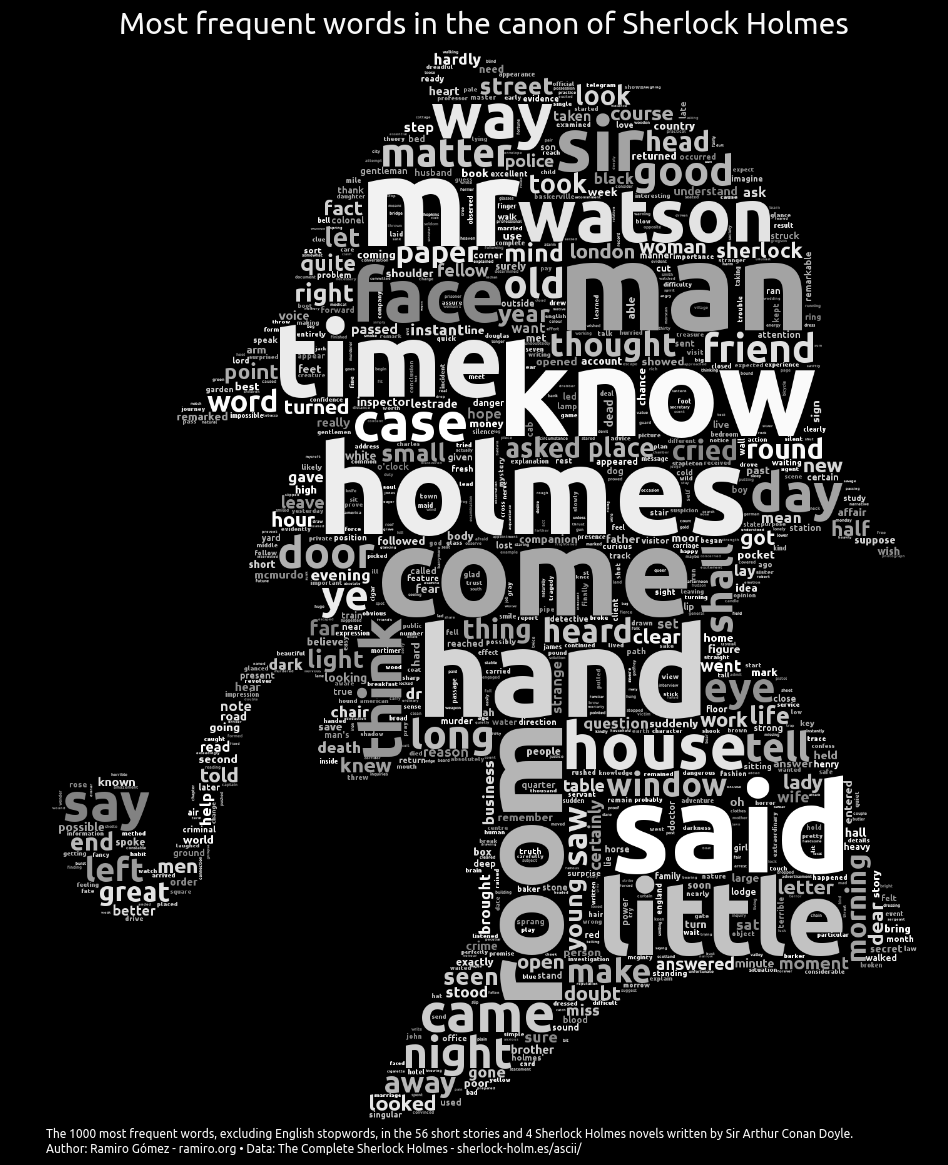

In [4]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(wordcloud.recolor(color_func=grey_color, random_state=3))
plt.title(title, color=fontcolor, size=30, y=1.01)
plt.annotate(footer, xy=(0, -.025), xycoords='axes fraction', fontsize=infosize, color=fontcolor)
plt.axis('off')
plt.show()

## Summary

Thanks to the plethora of awesome Python packages it requires just a few lines of code to generate a shaped word cloud like the one above. While there are more effective ways to visualize word frequencies, word clouds can be beautiful. They are probably more data art than visualization. Anyway, whether you love them or hate them, with Python it's easy to create them.

A higher resolution version of this word cloud is available as prints on posters and other products from [Redbubble](http://www.redbubble.com/people/ramiro/works/19373065-the-canon-of-sherlock-holmes-word-cloud).